In [1]:
import pandas as pd
import numpy as np

In [2]:
fire = pd.read_csv('./fire.csv')
fire.head()

,lon_lo,lat_la,top_tprt,avrg_wind_ve,avrg_hd,top_hd,msrm_dt,de_rnfl_qy,sqre_no,frfire_occrrnc_envrn_ix,...,km_cnvr_dstnc_lt,sqre_center_antcty_hg,sqre_clinc_val_co,tpgrph_ise_lc_at,frfire_occrrnc_se,frfire_occrrnc_day,frfire_frpout_reqre_time_pd,damge_area,dmge_am,frfr_ocrn_yn
0,111541.24336,72087.10099,18.018417,2.230915,68.584233,92.608428,all,3.580350,6271,84.066763,...,133.17,0.0,7,0,all,all,NaN,NaN,NaN,0
1,111541.24336,77080.21727,17.985438,2.280706,68.880049,92.805340,all,3.598067,6205,84.033719,...,129.07,0.0,7,0,all,all,NaN,NaN,NaN,0
2,111541.24336,82073.33355,17.930252,2.361917,69.282355,93.064326,all,3.624447,6139,83.986796,...,125.03,0.0,2,0,all,all,NaN,NaN,NaN,0
3,111541.24336,87066.44983,17.863302,2.460197,69.747470,93.360854,all,3.655772,6073,83.931035,...,121.07,0.0,7,0,all,all,NaN,NaN,NaN,0
4,111541.24336,92059.56611,17.795016,2.560564,70.224940,93.665789,all,3.687656,6007,83.870537,...,117.18,0.0,4,0,all,all,NaN,NaN,NaN,0


In [3]:
fire.isnull()

,lon_lo,lat_la,top_tprt,avrg_wind_ve,avrg_hd,top_hd,msrm_dt,de_rnfl_qy,sqre_no,frfire_occrrnc_envrn_ix,...,km_cnvr_dstnc_lt,sqre_center_antcty_hg,sqre_clinc_val_co,tpgrph_ise_lc_at,frfire_occrrnc_se,frfire_occrrnc_day,frfire_frpout_reqre_time_pd,damge_area,dmge_am,frfr_ocrn_yn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
6874,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
6875,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
6876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False


In [4]:
print(fire.columns)
print(len(fire))

Index(['lon_lo', 'lat_la', 'top_tprt', 'avrg_wind_ve', 'avrg_hd', 'top_hd',
       'msrm_dt', 'de_rnfl_qy', 'sqre_no', 'frfire_occrrnc_envrn_ix',
       'pmntn_co', 'su_center_dstnc_lt', 'ic_center_dstnc_lt',
       'dj_center_dstnc_lt', 'dg_center_dstnc_lt', 'bs_center_dstnc_lt',
       'us_center_dstnc_lt', 'gj_center_dstnc_lt',
       'bcity_center_avrg_dstnc_lt', 'km_cnvr_dstnc_lt',
       'sqre_center_antcty_hg', 'sqre_clinc_val_co', 'tpgrph_ise_lc_at',
       'frfire_occrrnc_se', 'frfire_occrrnc_day',
       'frfire_frpout_reqre_time_pd', 'damge_area', 'dmge_am', 'frfr_ocrn_yn'],
      dtype='object')
6878


In [5]:
only_fires = fire.dropna(subset=['frfire_occrrnc_envrn_ix'])
print(len(only_fires))

6878


### 각 위도 경도에 따른 산불발생환경지수 관계 파악  
- lon_lo : 경도
- lat_la : 위도
- frfire_occrrnc_envrn_ix : 산불발생환경지수

In [6]:
# 한글 깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# import matplotlib.font_manager as fm
# import warnings
# import matplotlib.pyplot as plt
# import seaborn as sns
# warnings.filterwarnings(action='ignore')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [11]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
warnings.filterwarnings(action='ignore')

In [12]:
plt.figure(figsize=(10, 6))
sampled_fire = fire.sample(frac=0.1, random_state=1)
print(len(sampled_fire))

688


<Figure size 1000x600 with 0 Axes>

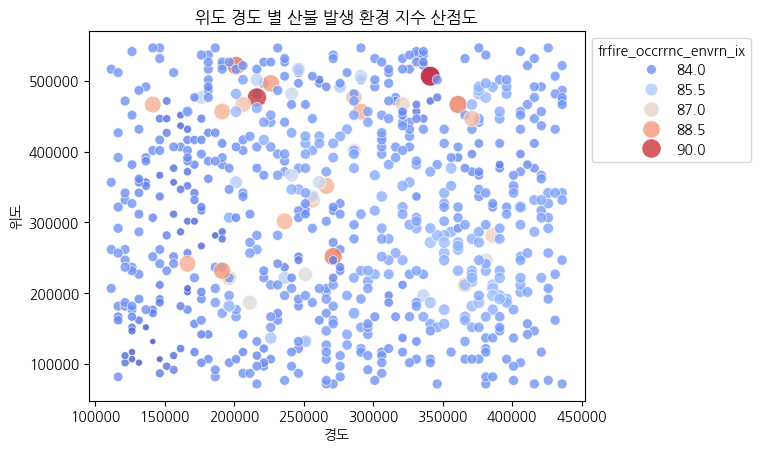

In [16]:
scatter = sns.scatterplot(
    data=sampled_fire,
    x='lon_lo',
    y='lat_la',
    hue='frfire_occrrnc_envrn_ix',
    palette='coolwarm',
    size='frfire_occrrnc_envrn_ix',
    sizes=(20, 200),
    alpha=0.8)

plt.xlabel('경도')
plt.ylabel('위도')
sns.move_legend(scatter, "upper left", bbox_to_anchor=(1, 1))
scatter.set_title('위도 경도 별 산불 발생 환경 지수 산점도')
plt.show()

### 평균 습도, 풍속, 최고 기온 별 산불발생환경지수

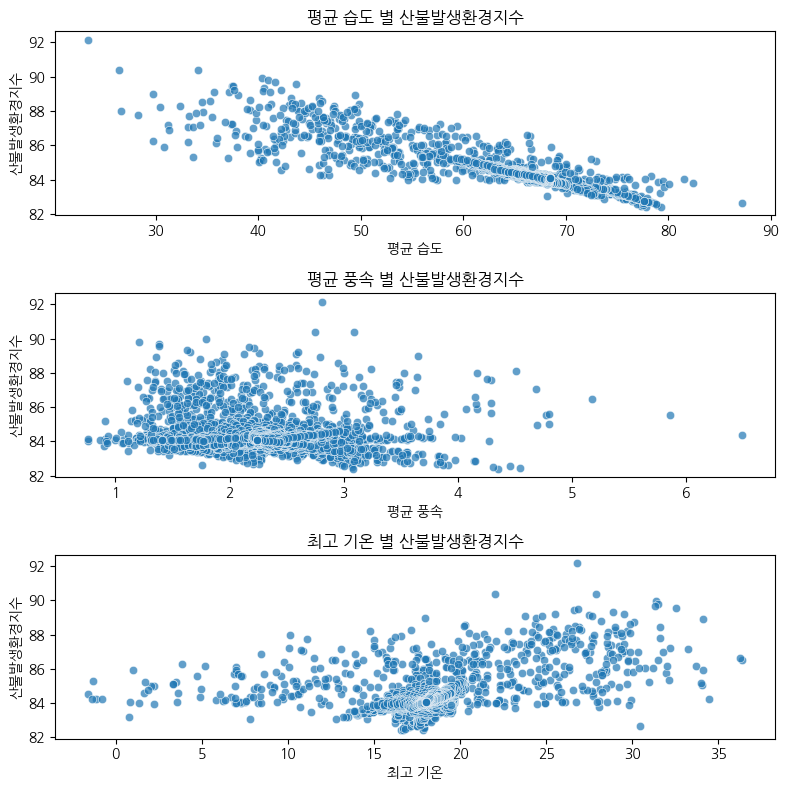

In [21]:
selected_columns = ['avrg_hd', 'avrg_wind_ve', 'top_tprt', 'frfire_occrrnc_envrn_ix']
df_selected = fire[selected_columns]

plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
sns.scatterplot(x='avrg_hd', y='frfire_occrrnc_envrn_ix', data=df_selected, alpha=0.7)
plt.xlabel('평균 습도')
plt.ylabel('산불발생환경지수')
plt.title('평균 습도 별 산불발생환경지수')

plt.subplot(3, 1, 2)
sns.scatterplot(x='avrg_wind_ve', y='frfire_occrrnc_envrn_ix', data=df_selected, alpha=0.7)
plt.xlabel('평균 풍속')
plt.ylabel('산불발생환경지수')
plt.title('평균 풍속 별 산불발생환경지수')

plt.subplot(3, 1, 3)
sns.scatterplot(x='top_tprt', y='frfire_occrrnc_envrn_ix', data=df_selected, alpha=0.7)
plt.xlabel('최고 기온')
plt.ylabel('산불발생환경지수')
plt.title('최고 기온 별 산불발생환경지수')

plt.tight_layout()
plt.show()

- 습도가 높을수록 산불발생환경지수가 낮음
- 풍속이 높을수록 산불발생환경지수가 높을 줄 알았으나, 그렇게 영향이 있지 않음
- 최고 기온이 높을수록 산불발생환경지수가 어느정도 높음

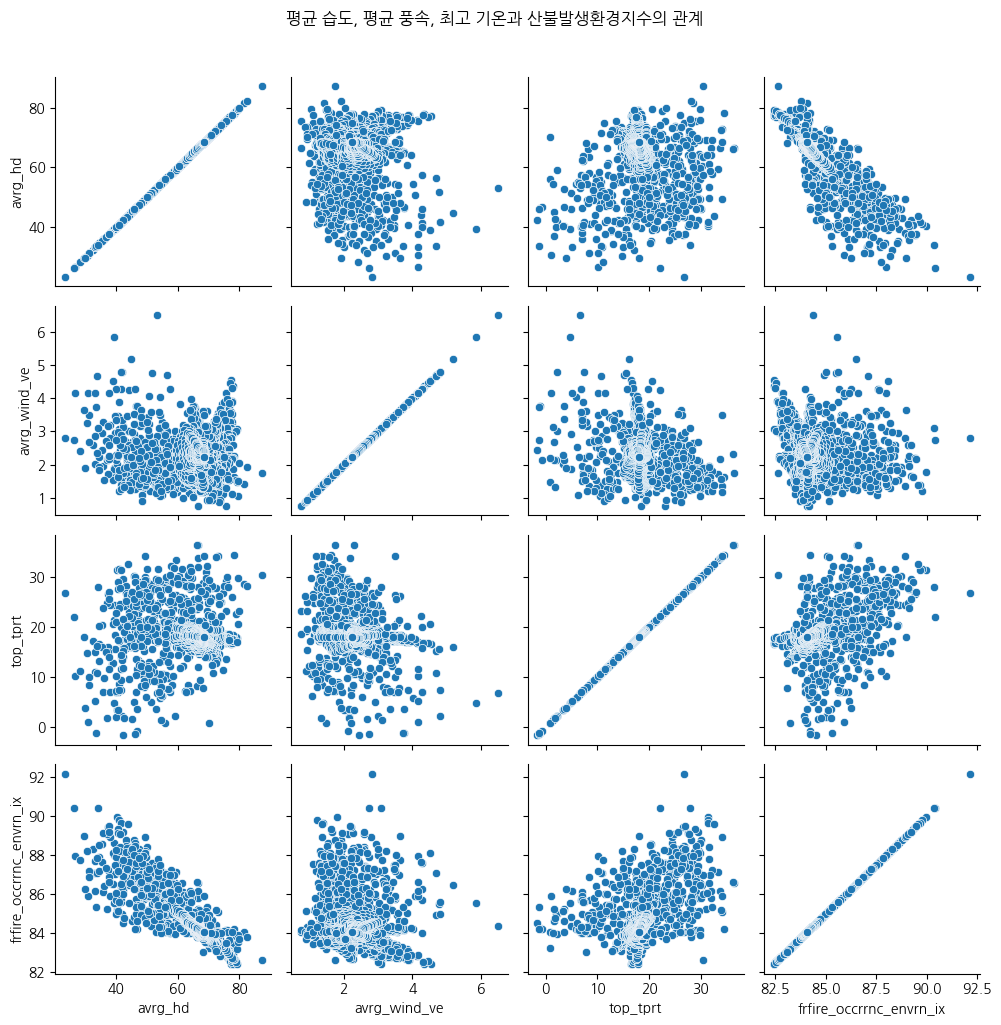

In [19]:
selected_columns = ['avrg_hd', 'avrg_wind_ve', 'top_tprt', 'frfire_occrrnc_envrn_ix']
df_selected = fire[selected_columns].dropna()

g = sns.PairGrid(df_selected)
g.map(sns.scatterplot)
g.fig.suptitle('평균 습도, 평균 풍속, 최고 기온과 산불발생환경지수의 관계', y=1.02)

plt.tight_layout()
plt.show()

### 피해 영역/비용과 화재 진압시간과의 산점도

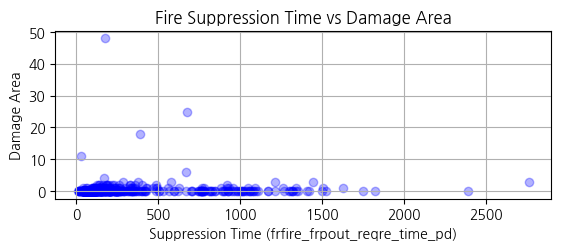

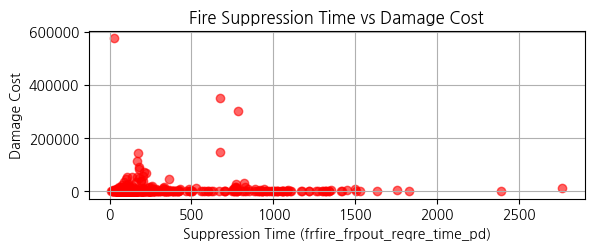

In [23]:
# df['frfire_frpout_reqre_time_pd'].dropna()

plt.subplot(2,1,1)
plt.scatter(fire['frfire_frpout_reqre_time_pd'], fire['damge_area'], color='blue', alpha=0.3)
plt.title('Fire Suppression Time vs Damage Area')
plt.xlabel('Suppression Time (frfire_frpout_reqre_time_pd)')
plt.ylabel('Damage Area')
plt.grid(True)
plt.show()

plt.subplot(2,1,2)
plt.scatter(fire['frfire_frpout_reqre_time_pd'], fire['dmge_am'], color='red', alpha=0.6)
plt.title('Fire Suppression Time vs Damage Cost')
plt.xlabel('Suppression Time (frfire_frpout_reqre_time_pd)')
plt.ylabel('Damage Cost')
plt.grid(True)
plt.show()